Создаем модель "предсказывающую" рост акции эпл

In [74]:
from sklearn.linear_model import LinearRegression 
import numpy as np
#данные роста акций эпл по дням 1 2 3 и т.д index -1 = день 
apple = np.array([156, 157, 158, 159, 160, 161,156, 157, 158, 159, 160, 161, 156, 157, 158, 159, 160, 161,
                  162, 163, 164, 164, 164, 164,162, 163, 164, 164, 164, 164,162, 163, 164, 164, 164, 164,
                  165, 165, 165, 165, 165,165, 165, 165, 165, 165,165, 165, 165, 165, 165,165, 165, 165, 165, 165,
                  167, 167, 167, 167, 165, 165,167, 167, 167, 167, 165, 165,167, 167, 167, 167, 165, 165,
                  167, 167, 168, 168, 169,167, 167, 168, 168, 169, 167, 167, 168, 168, 169,], dtype = float)

n = len(apple)
predic = [input("Ввведите желаемый день")]
model = LinearRegression().fit(np.arange(n).reshape((n, 1)), apple)
ml_pr = model.predict([predic])
print(ml_pr) # предсказываем за день 

[160.56920327]


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


Во-первых, мы создали простой набор данных из трех значений и сохранили его длину в отдельной переменной n ради сокращения кода. Наши данные состоят из трех курсов акций Apple за три последовательных дня. Этот набор данных хранится в переменной apple в виде одномерного массива NumPy.
Во-вторых, мы создали модель с помощью вызова LinearRegression(). Но какие значения параметров будут у этой модели? Чтобы их найти, мы обучаем
модель с помощью вызова функции fit(). Она принимает два аргумента: входные признаки обучающих данных и желаемые выходные сигналы для этих входных сигналов. Роль желаемых выходных сигналов играют настоящие курсы акций Apple. Входные же признаки необходимо передать fit() в виде массива в следующем формате:
[<обучающие_данные_1>,
<обучающие_данные_2>,
--сокращено--
<обучающие_данные_n>]
<обучающие_данные> = [признак_1, признак_2, ..., признак_k]
В нашем случае входной сигнал состоит лишь из одного признака x (текущий день). Более того, предсказание также состоит лишь из одного значения y (текущий курс акций). Чтобы изменить форму входного массива на нужную, необходимо привести его к виду следующей матрицы, выглядящей странновато:
[[0],
[1],
[2]]

Матрица из одного столбца называется вектором-столбцом. Для создания последовательности возрастающих значений x мы применим метод np.arange(), а затем воспользуемся reshape((n, 1)) для преобразования одномерного массива NumPy в двумерный, содержащий один столбец и n строк (см. главу 3). Обратите внимание, что scikit-learn допускает одномерный массив в качестве выходного сигнала (иначе нам бы пришлось изменить и форму массива данных apple).
Получив обучающие данные и желаемые выходные сигналы, функция fit() производит минимизацию погрешности: находит такие параметры модели (то есть прямую), что разность между предсказанными моделью значениями и желаемыми выходными сигналами минимальна.
Когда функция fit() сочтет, что модель доведена до ума, она возвращает модель, пригодную для предсказания двух новых значений курсов акций с помощью функции predict(). Требования к входным данным у функции predict() те же, что и у fit(), поэтому для их удовлетворения мы передаем матрицу из одного столбца с нашими двумя новыми значениями, для которых требуются предсказания:

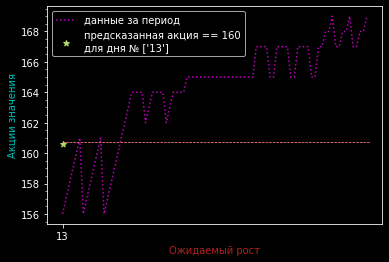

In [75]:
import matplotlib.pyplot as plt
plt.plot(apple,color = 'm', linestyle = ':', label = f'данные за период ' ) 
plt.scatter(predic,ml_pr, label = f'предсказанная акция == {int(ml_pr)}\nдля дня № {predic}', color = 'C6',marker = '*' )
plt.minorticks_on()
plt.legend()
plt.text(predic,ml_pr,'-------------------------------------------------------------------------------------', color = 'C3')
plt.xlabel("Ожидаемый рост", color = 'Firebrick')
plt.ylabel("Акции значения", color = 'c' )
plt.show()